The Sparks Foundation
 Tsk 3-Data Science and Business Analysis -Retail
 Objective- exploratory data analysis on dataset samplesuperstore as business manager try to fing out the weak area whre you can wotkk to make more profit and what all business problems can you derive by exploring the data choose pyhton and tableau tool
 Performed by - Agarwal Sneha


In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('/content/SampleSuperstore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
df.columns


Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [5]:
df.shape

(9994, 13)

In [6]:
# Summary statistics
print(df.describe())

        Postal Code         Sales     Quantity     Discount       Profit
count   9994.000000   9994.000000  9994.000000  9994.000000  9994.000000
mean   55190.379428    229.858001     3.789574     0.156203    28.656896
std    32063.693350    623.245101     2.225110     0.206452   234.260108
min     1040.000000      0.444000     1.000000     0.000000 -6599.978000
25%    23223.000000     17.280000     2.000000     0.000000     1.728750
50%    56430.500000     54.490000     3.000000     0.200000     8.666500
75%    90008.000000    209.940000     5.000000     0.200000    29.364000
max    99301.000000  22638.480000    14.000000     0.800000  8399.976000


In [7]:
#check of nullvalues
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

Statistical Summary

In [8]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [9]:
#dealing with duplicate values
df.duplicated().sum()

17

In [11]:
df.drop_duplicates(inplace=True)

In [14]:
#ANALYZING OF DATA
#OVERALL PROFITS/LOSS
print(df.dtypes)
profit_loss=round(df['Profit'].sum(),2)
print('overall profit/loss of business : $',profit_loss)

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object
overall profit/loss of business : $ 286241.42


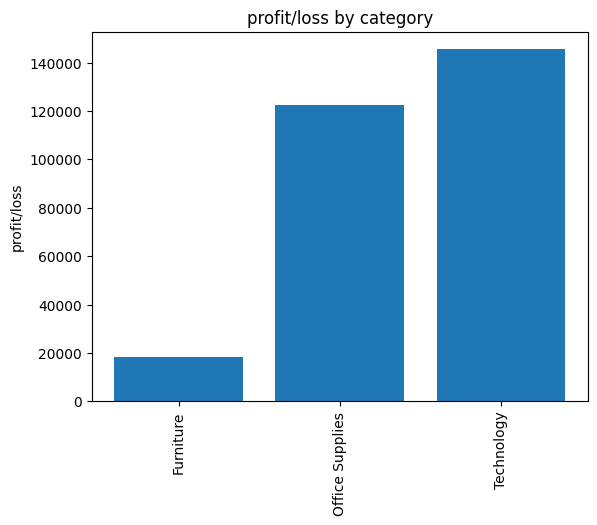

In [16]:
#Profit/Loss By Category
category_profit_loss=df.groupby('Category')['Profit'].sum().sort_values()


plt.bar(category_profit_loss.index,category_profit_loss.values)
plt.title("profit/loss by category")
plt.ylabel("profit/loss")
plt.xticks(rotation=90)
plt.show()

**Profit/Loss By Sub-Category**

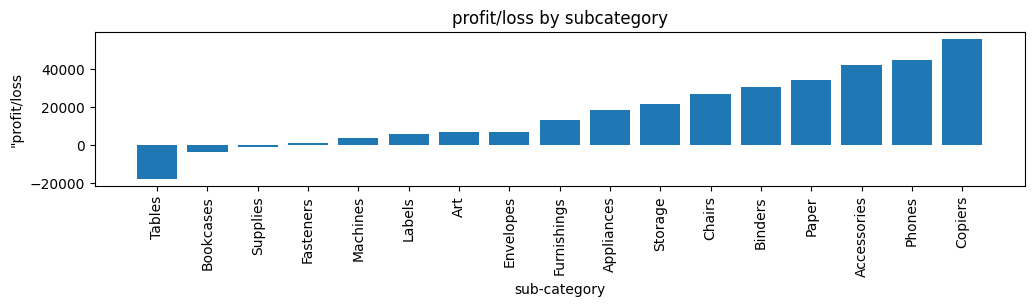

In [18]:
sub_category_profit_loss=df.groupby('Sub-Category')['Profit'].sum().sort_values()
plt.figure(figsize=(12,2))
plt.bar(sub_category_profit_loss.index,sub_category_profit_loss.values)
plt.title("profit/loss by subcategory")
plt.xlabel('sub-category')
plt.ylabel('"profit/loss')
plt.xticks(rotation=90)
plt.show()

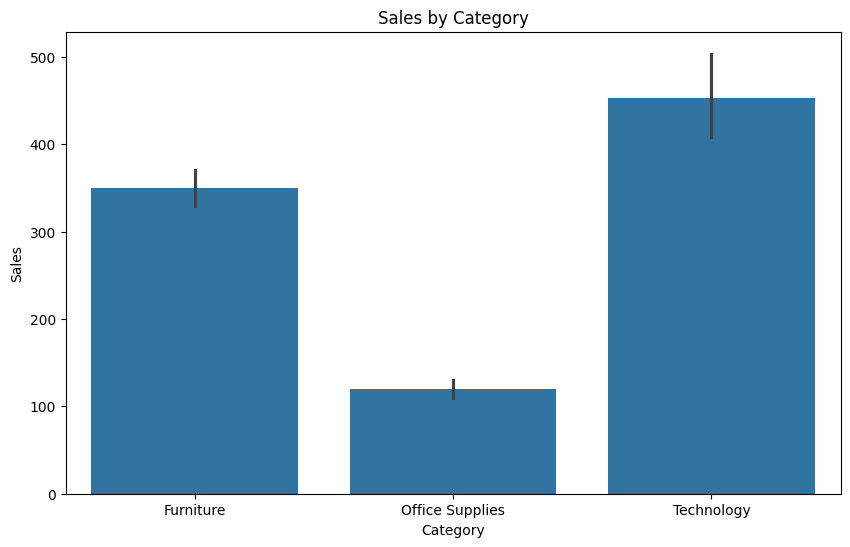

In [26]:
# Visualize sales by category
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Sales', data=df)
plt.title('Sales by Category')
plt.show()


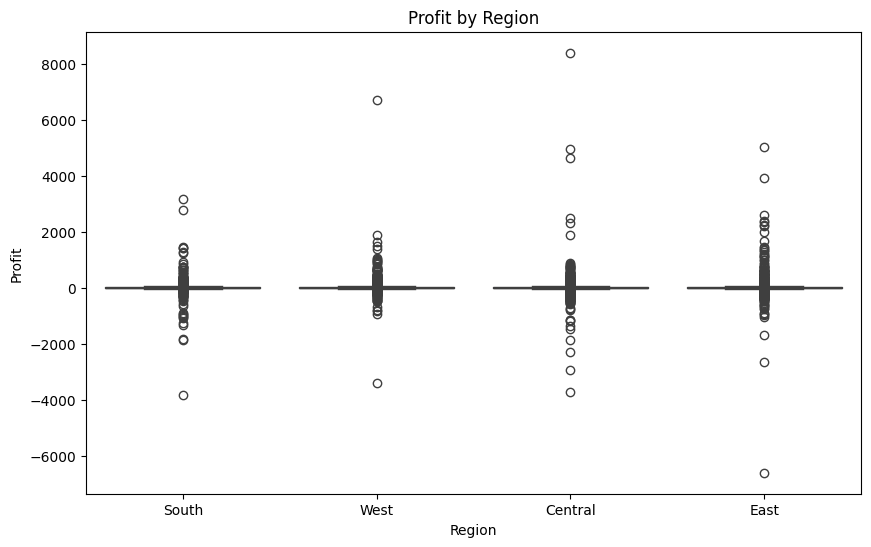

In [27]:
# Visualize profit by region
plt.figure(figsize=(10, 6))
sns.boxplot(x='Region', y='Profit', data=df)
plt.title('Profit by Region')
plt.show()

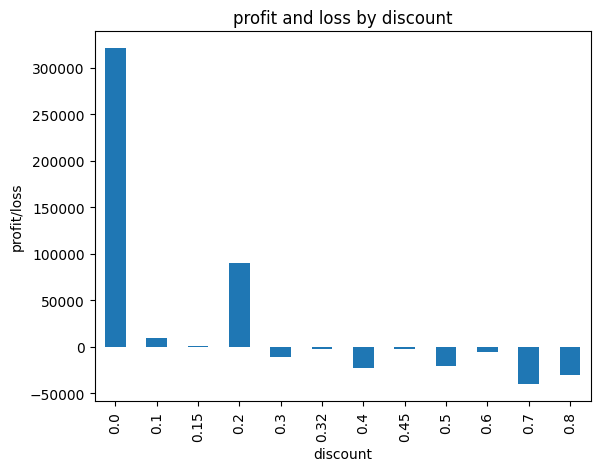

In [29]:
#profit/loss by discout
discount_profit_loss=df.groupby('Discount')['Profit'].sum()
discount_profit_loss.plot(kind='bar')
plt.title('profit and loss by discount')
plt.xlabel('discount')
plt.ylabel('profit/loss')
plt.show()

                       Sales       Profit
Ship Mode                                
First Class     3.513805e+05   48953.6561
Same Day        1.283217e+05   15871.8869
Second Class    4.591770e+05   57446.6516
Standard Class  1.357316e+06  163969.2280


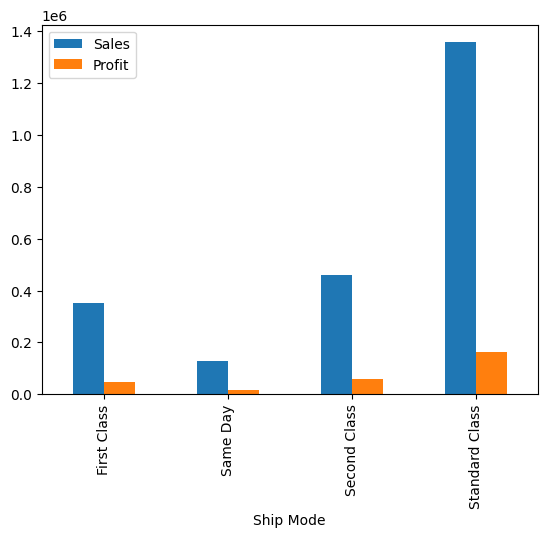

In [32]:
# Analyze sales and profit by ship mode
ship_mode_analysis = df.groupby('Ship Mode').agg({'Sales': 'sum', 'Profit': 'sum'})
ship_mode_analysis.plot(kind='bar')
print(ship_mode_analysis)

                    Sales       Profit
Segment                               
Consumer     1.160833e+06  134007.4413
Corporate    7.060701e+05   91954.9798
Home Office  4.292927e+05   60279.0015


<Axes: xlabel='Segment'>

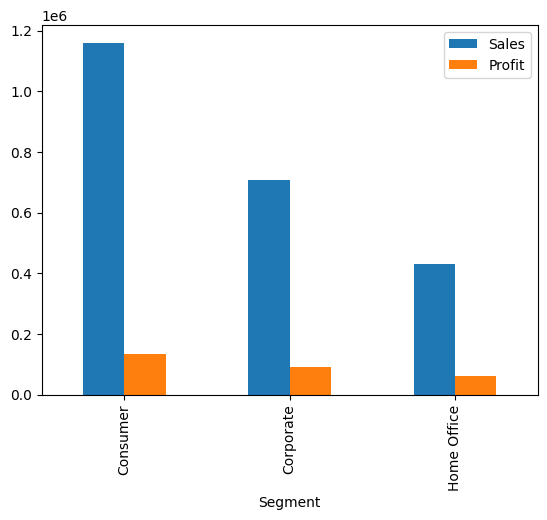

In [35]:
# Analyze sales and profit by segment
segment_analysis = df.groupby('Segment').agg({'Sales': 'sum', 'Profit': 'sum'})
print(segment_analysis)
segment_analysis.plot(kind='bar')

                    Sales      Profit
State                                
California    457576.2715  76330.7891
New York      310827.1510  74015.4622
Texas         170124.5418 -25750.9833
Washington    138560.8100  33368.2375
Pennsylvania  116496.3620 -15565.4035
Florida        89473.7080  -3399.3017
Illinois       80162.5370 -12601.6500
Ohio           77976.7640 -16959.3178
Michigan       75879.6440  24428.0903
Virginia       70636.7200  18597.9504


<Axes: xlabel='State'>

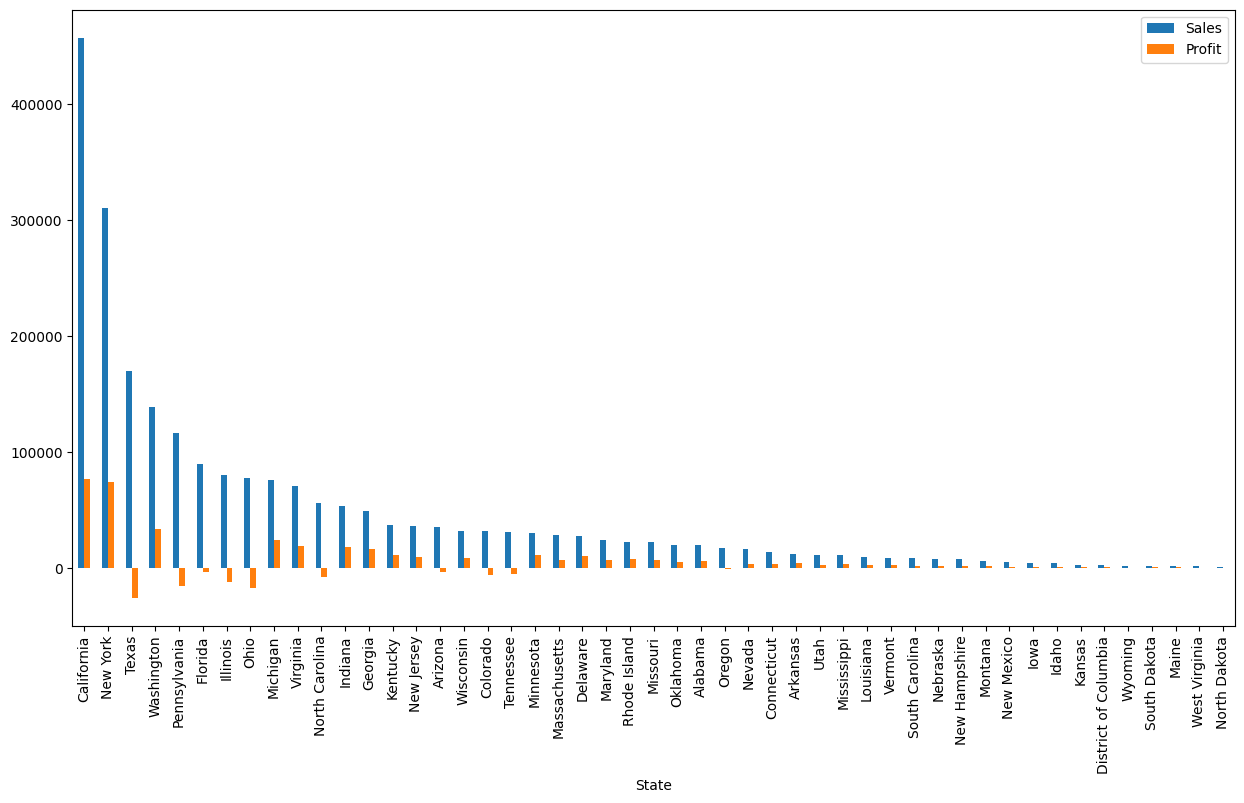

In [39]:
# Analyze sales and profit by state
state_analysis = df.groupby('State').agg({'Sales': 'sum', 'Profit': 'sum'}).sort_values(by='Sales', ascending=False)
print(state_analysis.head(10))
state_analysis.plot(kind='bar',figsize=(15,8))

In [40]:
df.to_csv('cleaned_samplesuperstore.csv', index=False)